## Problem Set - 3
### Submitted By - Rohan Khurana
### Date - 05/11/2020

#### Importing Important Packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import zipfile
import re

In [2]:
import numpy as np # Importing the Numpy library and assigning it an alias. 
import pandas as pd # Importing the Pandas library and assigning it an alias. 
import matplotlib.pyplot as matplot # Importing the Matplotlib library and assigning it an alias. 

#### Importing all the packages mentioned in the Class

In [246]:
# All the following packages are important for text analysis are a part of Natural Language Tool Kit for Python.
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import EnglishStemmer
from nltk.stem.lancaster import LancasterStemmer

In [4]:
# Packages for vectorization.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.decomposition import LatentDirichletAllocation as LDA 
import pyLDAvis 
import pyLDAvis.sklearn
warnings.filterwarnings("ignore", category=DeprecationWarning)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


## Part 1: Set-up

#### Problem - 1 

To begin, you will first work through processing the data. Start by loading in the training data
and test data. Keep each in their own dataframe/list (i.e. a dataframe/list for all training
observation text and a separate one for all test observations). How many training and test
observations do you have?

#### Trial importing a training txt file 

In [6]:
import pandas as pd
df = pd.read_csv('/Users/apple/Desktop/Problem_Set_3/train/Biden_train_1.txt', sep=" ")

#### Importing a list of all the file names of the training dataset  and testing dataset

In [7]:
import os
import glob

files_0 = list(glob.glob(os.path.join('/Users/apple/Desktop/Problem_Set_3/train','*.*')))

In [8]:
files_1 = list(glob.glob(os.path.join('/Users/apple/Desktop/Problem_Set_3/test','*.*')))

In [9]:
trial123 = files_1.copy()

In [10]:
trial123 = pd.DataFrame(trial123)

In [11]:
trial123.columns = ['File Name']

In [12]:
trial123['File Name'] = trial123['File Name'].map(lambda x: x.lstrip('/Users/apple/Desktop/Problem_Set_3/test')) # trying to remove all the unwanted strings all at once. 

In [14]:
trial123['File Name']= 'test_' + trial123['File Name'].astype(str) #Experimenting putting file name. 

#### Putting Training and Testing Dataset. 

In [15]:
training_data = pd.DataFrame([])
q = []
for i in files_0:
    k = open(i)
    b = k.read()
    q.append(b)
training_data['Comments'] = q #Creating Comments column in the testing dataframe. 

In [16]:
testing_data = pd.DataFrame([])
z = []
for i in files_1:
    k = open(i)
    b = k.read()
    z.append(b)
testing_data['Comments'] = z #Creating Comments column in the testing dataframe. 

#### Viewing Training Data

In [17]:
training_data

,Comments
0,Kamala Harris: Five million assault weapons ar...
1,Kamala Harris: So what I am saying is that it ...
2,Kamala Harris: Who has spent full time… Who ha...
3,"Elizabeth Warren: So let’s be clear, whenever ..."
4,Elizabeth Warren: This morning. I announced th...
...,...
523,"Amy Klobuchar: First of all, I’ve made it very..."
524,Elizabeth Warren: Yes. I think it should be. A...
525,Elizabeth Warren: So I think the way we achiev...
526,Kamala Harris: I think that it’s unfortunate t...


We can see that there are 528 observations in the training dataset.

#### Viewing Testing Data

In [18]:
testing_data

,Comments
0,I agree. Let me… She referenced me. I agreed w...
1,"Well, a few months after I got elected, the la..."
2,"Thank you. Probably Rand Paul. He and I, actua..."
3,"So in my view, if fraud is involved, then that..."
4,"So, first of all, Washington experience is not..."
...,...
106,"Look, on this issue, my friends, there is no c..."
107,"And you know what, we came back four years lat..."
108,Think about the nuclear agreement with Russia ...
109,You want to know how we get this done? We get ...


In [247]:
testing_data['Comments'][108:109] #Random inspection of testing_data

108    Think about the nuclear agreement with Russia ...
Name: Comments, dtype: object

We can observe that we have 528 training observations and 111 testing observations. 

#### Problem 2 

Create a vector of training labels. These labels can be found in one of two ways: in the file
name of each training data observation and at the beginning of the text for each training file.
The test data will not have the labels at the beginning of the text so remove these labels from
your training observations. Are there any instances where the name of the file does not align
with the name at the start of the text? If so, how many such observations are there? Exclude
these from your training data. What does the distribution of labels look like? Comment on
what you see.

#### Creating a Vector of Training Labels. 

In [20]:
k = [] #Initializing empty list k. 
for i in files_0:
    start = i.find("n/") + len("n/")
    end = i.find("_t")
    k.append(i[start:end])

#### Adding a column of Labels in the Training Data

In [21]:
training_data['Names'] = k

#### Viewing labels Data in the Dataframe 

In [22]:
training_data

,Comments,Names
0,Kamala Harris: Five million assault weapons ar...,Harris
1,Kamala Harris: So what I am saying is that it ...,Harris
2,Kamala Harris: Who has spent full time… Who ha...,Harris
3,"Elizabeth Warren: So let’s be clear, whenever ...",Warren
4,Elizabeth Warren: This morning. I announced th...,Warren
...,...,...
523,"Amy Klobuchar: First of all, I’ve made it very...",Klobuchar
524,Elizabeth Warren: Yes. I think it should be. A...,Warren
525,Elizabeth Warren: So I think the way we achiev...,Warren
526,Kamala Harris: I think that it’s unfortunate t...,Harris


We can observe that we have successfully created a dataframe with training labels. 

In [23]:
x = [] #Initializing empty list. 
count_True = 0 
count_False = 0 
training_data['Check'] = ['NULL']* training_data.shape[0] #Initializing the empty column. 
for i in range(training_data.shape[0]):
    p = training_data.iloc[i]['Names']
    t = (training_data.iloc[i]['Comments'].split(' ')[1])[:-1]
    if t == p:
        training_data.at[i,'Check'] = 'True'
        count_True += 1 
    else:
        training_data.at[i,'Check'] = 'False'
        count_False += 1

In [248]:
count_True #Counts instances where the name of the file aligns with the name of the start of the text. 

528

In [25]:
count_False #Counts instances where the name of the file does not align with the name of the start of the text. 

0

We observe that there are no such instances where the name of the file does not align with the name at the start of the text.

#### Checking the Count of Labels

In [26]:
training_data.Names.value_counts()

Warren       80
Biden        60
Sanders      60
Buttigieg    60
Klobuchar    55
Booker       50
Harris       40
O'Rourke     33
Yang         32
Castro       23
Steyer       19
Gabbard      16
Name: Names, dtype: int64

We can observe the distribution of training labels as described above.We can see that in our training data we have most observations from Senator Elizabeth Warren and the least from Representative Tulsi Gabbard. 

#### Problem 3

Convert the training data to lower case. Remove punctuation from the training data. Also
remove stop words from the training data using the NLTK package’s English stop word list. In
addition to NLTK’s stopwords, are there words specific to this dataset that may be worthwhile
to treat as stop words? What are these words and why would you exclude them? Remove
these additional stop words from the training data as well (note: you can also remove this
secondary set of stop words after tokenizing. However, keep in mind that this may cause
feature alignment issues with your test dataset when you tokenize it.)

In [28]:
training_data_new = training_data.copy() #Copying data to avoid any problems later on. 

In [29]:
training_data_new

,Comments,Names,Check
0,Kamala Harris: Five million assault weapons ar...,Harris,True
1,Kamala Harris: So what I am saying is that it ...,Harris,True
2,Kamala Harris: Who has spent full time… Who ha...,Harris,True
3,"Elizabeth Warren: So let’s be clear, whenever ...",Warren,True
4,Elizabeth Warren: This morning. I announced th...,Warren,True
...,...,...,...
523,"Amy Klobuchar: First of all, I’ve made it very...",Klobuchar,True
524,Elizabeth Warren: Yes. I think it should be. A...,Warren,True
525,Elizabeth Warren: So I think the way we achiev...,Warren,True
526,Kamala Harris: I think that it’s unfortunate t...,Harris,True


#### Converting column text to lower case

In [30]:
training_data_new['Comments'] = training_data_new['Comments'].str.lower()

#### Checking the lower case data

In [31]:
training_data_new

,Comments,Names,Check
0,kamala harris: five million assault weapons ar...,Harris,True
1,kamala harris: so what i am saying is that it ...,Harris,True
2,kamala harris: who has spent full time… who ha...,Harris,True
3,"elizabeth warren: so let’s be clear, whenever ...",Warren,True
4,elizabeth warren: this morning. i announced th...,Warren,True
...,...,...,...
523,"amy klobuchar: first of all, i’ve made it very...",Klobuchar,True
524,elizabeth warren: yes. i think it should be. a...,Warren,True
525,elizabeth warren: so i think the way we achiev...,Warren,True
526,kamala harris: i think that it’s unfortunate t...,Harris,True


We can see that we have successfully converted the text into lower case. 

#### Removing the Punctuation from lower case comments

In [32]:
training_data_new["new_column"] = training_data_new['Comments'].str.replace('[^\w\s]','')

In [33]:
training_data_new

,Comments,Names,Check,new_column
0,kamala harris: five million assault weapons ar...,Harris,True,kamala harris five million assault weapons are...
1,kamala harris: so what i am saying is that it ...,Harris,True,kamala harris so what i am saying is that it s...
2,kamala harris: who has spent full time… who ha...,Harris,True,kamala harris who has spent full time who has ...
3,"elizabeth warren: so let’s be clear, whenever ...",Warren,True,elizabeth warren so lets be clear whenever som...
4,elizabeth warren: this morning. i announced th...,Warren,True,elizabeth warren this morning i announced this...
...,...,...,...,...
523,"amy klobuchar: first of all, i’ve made it very...",Klobuchar,True,amy klobuchar first of all ive made it very cl...
524,elizabeth warren: yes. i think it should be. a...,Warren,True,elizabeth warren yes i think it should be all ...
525,elizabeth warren: so i think the way we achiev...,Warren,True,elizabeth warren so i think the way we achieve...
526,kamala harris: i think that it’s unfortunate t...,Harris,True,kamala harris i think that its unfortunate tha...


We can see that we have removed all the punctuation and even lower cased the sentences and stored them in a new column under the name 'new_column'

#### Just observing the finally processed text 

In [34]:
training_data_new.iloc[151]['new_column'] #Random observation of one of the analysed entries. 

'pete buttigieg if i had a buck for every argument that ive witnessed like this i could pay for college for everybody we need to move past what has been consuming this whole political space for as long as ive been alive were being offered a false choice i dont agree with the vice president that trump is an aberration i dont agree that theres any such thing as back to normal because here in the industrial midwest definitely where i live normal didnt work thats part of how we got here thats part of how a guy like donald trump managed to get within cheating distance of the oval office in the first place but i also dont agree with elizabeth warren that the only way forward is infinite partisan combat yes we have to fight absolutely we have to fight for the big changes at hand but its going to take more than fighting'

#### Splitting the data in the 'new_column'

In [35]:
training_data_new["new_column"] = training_data_new["new_column"].str.split() #Splitting the sentences into indivisual texts to process further for stop word removal. 

In [36]:
stop = stopwords.words('english') #Storing all the stop words present in the NLTK for English language.

#### Removing stop words from the new_column

In [37]:
training_data_new['new_column'] = training_data_new['new_column'].apply(lambda x: [item for item in x if item not in stop])

#### Viewing the first row of the new_column

In [38]:
training_data_new.iloc[1]['new_column']

['kamala',
 'harris',
 'saying',
 'seems',
 'would',
 'able',
 'join',
 'saying',
 'rule',
 'apply',
 'twitter',
 'way',
 'facebook']

We can observe that we have successfully removed the stop words from our new_column.

#### Removing the Politician's name in addition to the stop words 

The words removed here are the politician's names as that could easily affect our analysis. These words are in addition to the stop words mentioned in NLTK, so here we remove the first 2 words from every set of stop words as they contain the name of the political leader. 

In [39]:
training_data_new['new_column'] = training_data_new['new_column'].apply(lambda x: x[2:])

In [40]:
training_data_new

,Comments,Names,Check,new_column
0,kamala harris: five million assault weapons ar...,Harris,True,"[five, million, assault, weapons, streets, ame..."
1,kamala harris: so what i am saying is that it ...,Harris,True,"[saying, seems, would, able, join, saying, rul..."
2,kamala harris: who has spent full time… who ha...,Harris,True,"[spent, full, time, spent, full, time, critici..."
3,"elizabeth warren: so let’s be clear, whenever ...",Warren,True,"[lets, clear, whenever, someone, hears, term, ..."
4,elizabeth warren: this morning. i announced th...,Warren,True,"[morning, announced, morning, im, going, take,..."
...,...,...,...,...
523,"amy klobuchar: first of all, i’ve made it very...",Klobuchar,True,"[first, ive, made, clear, think, pete, qualifi..."
524,elizabeth warren: yes. i think it should be. a...,Warren,True,"[yes, think, three, brothers, served, military..."
525,elizabeth warren: so i think the way we achiev...,Warren,True,"[think, way, achieve, goals, bring, country, t..."
526,kamala harris: i think that it’s unfortunate t...,Harris,True,"[think, unfortunate, someone, stage, attemptin..."


We can successfully observe that the name of the politician is also removed. 

#### Problem - 4

Stem/lemmatize your training data using a stemmer/lemmatizer of your choosing. Show a
before and after using a few observations and comment on what you see.

#### Checking which is correct here,  Porter and Lancaster Stemmer 

In [41]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [42]:
porter = PorterStemmer()
lancaster=LancasterStemmer()

#### Side by Side comparision of before and after Stemming.

In [43]:
Exact_Word = []
Porter_Analysis = []
Lancaster_Analysis = []
for i in range(training_data_new.shape[0]):
    for word in training_data_new.iloc[i]['new_column']:
        Exact_Word.append(word)
        Porter_Analysis.append(porter.stem(word))
        Lancaster_Analysis.append(lancaster.stem(word))

In [44]:
Porter_Lancaster = pd.DataFrame(
    {'Words': Exact_Word,
     'Porter Stemmer': Porter_Analysis,
     'lancaster Stemmer': Lancaster_Analysis
    })

In [45]:
Porter_Lancaster

,Words,Porter Stemmer,lancaster Stemmer
0,five,five,fiv
1,million,million,mil
2,assault,assault,assault
3,weapons,weapon,weapon
4,streets,street,streets
...,...,...,...
30788,let,let,let
30789,women,women,wom
30790,make,make,mak
30791,decisions,decis,decid


We can observe side by side comparision b/w Porter and Lancaster Stemmer along with a before and after stemming example. 

#### Lemmatization 

In [46]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [47]:
lemma = []
for i in range(training_data_new.shape[0]):
    for word in training_data_new.iloc[i]['new_column']:
        lemma.append(wordnet_lemmatizer.lemmatize(word))

#### Comparision between Porter, Lancaster stemming and Lemmitization. 

In [48]:
Porter_Lancaster_Lemmatization = pd.DataFrame(
    {'Words': Exact_Word,
     'Porter Stemmer': Porter_Analysis,
     'lancaster Stemmer': Lancaster_Analysis,
     'Lemmatization':lemma
    })

In [49]:
Porter_Lancaster_Lemmatization.head(50)

,Words,Porter Stemmer,lancaster Stemmer,Lemmatization
0,five,five,fiv,five
1,million,million,mil,million
2,assault,assault,assault,assault
3,weapons,weapon,weapon,weapon
4,streets,street,streets,street
5,america,america,americ,america
6,today,today,today,today
7,course,cours,cours,course
8,debate,debat,deb,debate
9,eight,eight,eight,eight


After observing the side by side comparision between the analysis results through stemming (Porter and Lancaster) and Lemmatization we see that it is better to go with Lemmatization and additionally as seen that Lemmatization makes the computation longer but we don't have a lot of observations we can go with it. So we decide to move with Lemmitization.

#### Finally Choosing Lemmatization

In [50]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
training_data_new['Final'] = training_data_new['new_column'].apply(lambda x: ([wordnet_lemmatizer.lemmatize(k) for k in x]))


#### Creating a new column under the name of Final

Removing the list and converting it to strings

In [51]:
training_data_new['Final'] = training_data_new['Final'].apply(lambda x: (" ".join(x)))

In [52]:
training_data_new

,Comments,Names,Check,new_column,Final
0,kamala harris: five million assault weapons ar...,Harris,True,"[five, million, assault, weapons, streets, ame...",five million assault weapon street america tod...
1,kamala harris: so what i am saying is that it ...,Harris,True,"[saying, seems, would, able, join, saying, rul...",saying seems would able join saying rule apply...
2,kamala harris: who has spent full time… who ha...,Harris,True,"[spent, full, time, spent, full, time, critici...",spent full time spent full time criticizing pe...
3,"elizabeth warren: so let’s be clear, whenever ...",Warren,True,"[lets, clear, whenever, someone, hears, term, ...",let clear whenever someone hears term medicare...
4,elizabeth warren: this morning. i announced th...,Warren,True,"[morning, announced, morning, im, going, take,...",morning announced morning im going take money ...
...,...,...,...,...,...
523,"amy klobuchar: first of all, i’ve made it very...",Klobuchar,True,"[first, ive, made, clear, think, pete, qualifi...",first ive made clear think pete qualified stag...
524,elizabeth warren: yes. i think it should be. a...,Warren,True,"[yes, think, three, brothers, served, military...",yes think three brother served military one ca...
525,elizabeth warren: so i think the way we achiev...,Warren,True,"[think, way, achieve, goals, bring, country, t...",think way achieve goal bring country together ...
526,kamala harris: i think that it’s unfortunate t...,Harris,True,"[think, unfortunate, someone, stage, attemptin...",think unfortunate someone stage attempting dem...


In [53]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(training_data_new.Final.values)

#### Converting sparse matrix into a Pandas Dataframe

In [55]:
training_matrix_df = pd.DataFrame.sparse.from_spmatrix(X)

In [56]:
training_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,4477,4478,4479,4480,4481,4482,4483,4484,4485,4486
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
524,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Renaming the columns 

In [57]:
training_matrix_df.columns = vectorizer.get_feature_names()

In [58]:
training_matrix_df.columns[141] # By trial and error it is calculated that the the first 142 columns which have numerical
#column names need to be removed. 

'99'

#### Dropping the unwanted columns

In [59]:
training_matrix_df.drop(training_matrix_df.iloc[:, 0:142], inplace = True, axis = 1)

In [60]:
training_matrix_df.columns

Index(['abandoned', 'abandoning', 'abc', 'aberration', 'ability', 'able',
       'abortion', 'abraham', 'abrams', 'abroad',
       ...
       'youd', 'youll', 'young', 'younger', 'youre', 'youve', 'zealand',
       'zelensky', 'zero', 'zuckerberg'],
      dtype='object', length=4345)

In [61]:
sum_col = []
for col in training_matrix_df.columns:
    p = sum(training_matrix_df[col])
    sum_col.append(p)

In [62]:
sum_col.sort(reverse = True) ### We choose 150 as our higher frequency 

We have 4345 unique tokens. 

In [63]:
Count_Df = pd.DataFrame(
    {'Unique_Words': training_matrix_df.columns,
     'Count':sum_col
    })

In [64]:
Count_Df.head(10)

,Unique_Words,Count
0,abandoned,488
1,abandoning,278
2,abc,263
3,aberration,251
4,ability,227
5,able,217
6,abortion,211
7,abraham,203
8,abrams,201
9,abroad,195


In [65]:
freq_upper = 212
freq_lower = 0 

We are choosing these word counts as if we choose 1 for lower, we would need to drop a lot of words and so we choose 0 and for upper end we observe above 212 there are words which are important but are present in very high numbers which again would contribute much to the analysis. 

In [66]:
Count_Df.head(10)

,Unique_Words,Count
0,abandoned,488
1,abandoning,278
2,abc,263
3,aberration,251
4,ability,227
5,able,217
6,abortion,211
7,abraham,203
8,abrams,201
9,abroad,195


In [67]:
Count_Df = Count_Df[(Count_Df['Count'] < freq_upper) & (Count_Df['Count'] > freq_lower) ]

We can see that we have removed words which did not meet our predefined Frequency Criterion. 

In [68]:
training_matrix_df = training_matrix_df.loc[:,Count_Df.Unique_Words]

In [69]:
training_matrix_df

,abortion,abraham,abrams,abroad,absolute,absolutely,absurd,abuse,abused,abuser,...,youd,youll,young,younger,youre,youve,zealand,zelensky,zero,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have 4339 unique tokens in our analysis. 

#### Problem 6 

Process the test data in a manner identical to the training data. Note that you will need to
have the same dimensions for your training and test data. One way in which this can be done
is using sklearn’s CountVectorizer is to fit on the training data and transform the test data.
Show that the number of features for your training and test data are identical.

In [70]:
testing_data

,Comments
0,I agree. Let me… She referenced me. I agreed w...
1,"Well, a few months after I got elected, the la..."
2,"Thank you. Probably Rand Paul. He and I, actua..."
3,"So in my view, if fraud is involved, then that..."
4,"So, first of all, Washington experience is not..."
...,...
106,"Look, on this issue, my friends, there is no c..."
107,"And you know what, we came back four years lat..."
108,Think about the nuclear agreement with Russia ...
109,You want to know how we get this done? We get ...


In [71]:
testing_data_new = testing_data.copy() #Saving data to make sure we don't face any problem in future analysis. 

In [72]:
testing_data_new

,Comments
0,I agree. Let me… She referenced me. I agreed w...
1,"Well, a few months after I got elected, the la..."
2,"Thank you. Probably Rand Paul. He and I, actua..."
3,"So in my view, if fraud is involved, then that..."
4,"So, first of all, Washington experience is not..."
...,...
106,"Look, on this issue, my friends, there is no c..."
107,"And you know what, we came back four years lat..."
108,Think about the nuclear agreement with Russia ...
109,You want to know how we get this done? We get ...


#### Converting the Comments in Lower Case

In [73]:
testing_data_new['Comments'] = testing_data_new['Comments'].str.lower()

#### Removing punctuation from the Comments

In [74]:
testing_data_new["new_column"] = testing_data_new['Comments'].str.replace('[^\w\s]','')

#### Splitting the Comments in the testing data

In [75]:
testing_data_new["new_column"] = testing_data_new["new_column"].str.split()

#### Removing Stop words from the testing data

In [76]:
testing_data_new['new_column'] = testing_data_new['new_column'].apply(lambda x: [item for item in x if item not in stop])

In [77]:
testing_data_new

,Comments,new_column
0,i agree. let me… she referenced me. i agreed w...,"[agree, let, referenced, agreed, great, job, w..."
1,"well, a few months after i got elected, the la...","[well, months, got, elected, law, firm, got, c..."
2,"thank you. probably rand paul. he and i, actua...","[thank, probably, rand, paul, actually, invite..."
3,"so in my view, if fraud is involved, then that...","[view, fraud, involved, thats, suitable, crimi..."
4,"so, first of all, washington experience is not...","[first, washington, experience, experience, ma..."
...,...,...
106,"look, on this issue, my friends, there is no c...","[look, issue, friends, choice, got, super, agg..."
107,"and you know what, we came back four years lat...","[know, came, back, four, years, later, largest..."
108,think about the nuclear agreement with russia ...,"[think, nuclear, agreement, russia, precipitou..."
109,you want to know how we get this done? we get ...,"[want, know, get, done, get, done, courageous,..."


#### Lemmatizing the testing data

In [78]:
testing_data_new['Final'] =testing_data_new['new_column'].apply(lambda x: ([wordnet_lemmatizer.lemmatize(k) for k in x]))

#### Converting Lists into string in Final Column of testinig data

In [79]:
testing_data_new['Final'] = testing_data_new['Final'].apply(lambda x: (" ".join(x)))

In [80]:
vectorizer = CountVectorizer()
Y = vectorizer.fit(training_data_new.Final.values)

In [81]:
Y = vectorizer.transform(testing_data_new.Final.values)

#### Converting Sparse matrix to Pandas Dataframe

In [83]:
testing_matrix_df = pd.DataFrame.sparse.from_spmatrix(Y)

In [84]:
testing_matrix_df 

,0,1,2,3,4,5,6,7,8,9,...,4477,4478,4479,4480,4481,4482,4483,4484,4485,4486
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
testing_matrix_df.columns = vectorizer.get_feature_names()

In [86]:
sum_col_test = []
for col in testing_matrix_df.columns:
    p = sum(testing_matrix_df[col])
    sum_col_test.append(p)

# sum_col_test.sort(reverse = True)

Count_Df_test = pd.DataFrame(
    {'Unique_Words': testing_matrix_df.columns,
     'Count':sum_col_test
    })

In [87]:
Count_Df_test

,Unique_Words,Count
0,002,0
1,005,0
2,10,2
3,100,3
4,1000,2
...,...,...
4482,youve,9
4483,zealand,0
4484,zelensky,0
4485,zero,2


#### Dropping the Unwanted Columns / words or words with characters

In [88]:
testing_matrix_df.drop(testing_matrix_df.iloc[:, 0:142], inplace = True, axis = 1)

In [89]:
testing_matrix_df #Our final testing matrix that we will use in analysis. 

,abandoned,abandoning,abc,aberration,ability,able,abortion,abraham,abrams,abroad,...,youd,youll,young,younger,youre,youve,zealand,zelensky,zero,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
testing_matrix_df = testing_matrix_df.loc[:,Count_Df.Unique_Words]

In the above code we removed all such tokens which did not meet our frequency criterion

#### Problem - 7

The primary objective of this problem set is to build classifiers to predict who said what.
Having the right features are essential for this (and any) prediction task. In addition to the
features you were tasked with generating in Part 1, design/build additional features of your
choosing. Please note that this process can be iterative in a cycle of designing/adding features
and evaluating model performance - this is completely reasonable and you can come back
to this question after completing the remainder of Part 2. Describe the features that you
ultimately used in your final models and articulate your reasoning for including the features
that you did. Also describe any feature manipulation/scaling you did and your reasoning for
doing so. Ensure your test set has identical features as your training set. Some potential ideas
for additional features include bi-/trigrams, topic model weights, TF-IDF weights, sentiments,
hand-engineered word co-occurrences (not adding any/all of these is completely fine as well).

We are going with TF-IDF analysis as count vectorizer gives a vector with the number of times each word appears in the document whereas TF-IDF in essence gives a metric which shows the importance of a words in a particular document by balancing out the term frequency (how often the word appears in the document) with its inverse document frequency (how often the term appears across all documents in the data set).
Reference - https://www.quora.com/Why-TF-IDF-transformation-works-better-than-Count-Vectorizer-in-Machine-Learning

In [92]:
tf_vectorizer = TfidfVectorizer(min_df = 0.01)

In [93]:
tfidf = tf_vectorizer.fit_transform(training_data_new.Final.values)

In [95]:
tf_training_matrix_df = pd.DataFrame.sparse.from_spmatrix(tfidf)

In [96]:
tf_training_matrix_df.columns = tf_vectorizer.get_feature_names()

In [97]:
tf_training_matrix_df #Creating our sparse matrix as created in a similar way above. 

,10,100,12,15,18,20,2020,21st,30,40,...,wrote,yeah,year,yes,yesterday,yet,york,young,youre,youve
0,0.0,0.109919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.065454,0.000000,0.0,0.0,0.0,0.106904,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
524,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.060213,0.081717,0.0,0.0,0.0,0.000000,0.0,0.000000
525,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.242948
526,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.175756,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


#### Removing unwanted tokens which have numerical values or specialcharacters along with texts

In [98]:
tf_training_matrix_df.drop(tf_training_matrix_df.iloc[:, 0:15], inplace = True, axis = 1)

In [99]:
tf_training_matrix_df

,ability,able,absolutely,access,accountability,accountable,across,act,action,actually,...,wrote,yeah,year,yes,yesterday,yet,york,young,youre,youve
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.292841,0.23059,0.000000,...,0.0,0.0,0.065454,0.000000,0.0,0.0,0.0,0.106904,0.0,0.000000
1,0.000000,0.334548,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.397654,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.102635,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
524,0.000000,0.164683,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.060213,0.081717,0.0,0.0,0.0,0.000000,0.0,0.000000
525,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.242948
526,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.175756,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


#### Preparing Tf-IDF testing data

In [100]:
Z = tf_vectorizer.fit(training_data_new.Final.values)

Z = tf_vectorizer.transform(testing_data_new.Final.values)

In [101]:
tf_testing_matrix_df = pd.DataFrame.sparse.from_spmatrix(Z)

In [102]:
tf_testing_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.075223,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.078243,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
tf_testing_matrix_df.columns = tf_vectorizer.get_feature_names()

In [104]:
tf_testing_matrix_df.drop(tf_testing_matrix_df.iloc[:, 0:15], inplace = True, axis = 1)

In [105]:
tf_testing_matrix_df 

,ability,able,absolutely,access,accountability,accountable,across,act,action,actually,...,wrote,yeah,year,yes,yesterday,yet,york,young,youre,youve
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.179855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120877,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.075223,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.078243,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see that we have successfully created our TF-IDF testing matrix dataframe. 

#### Problem - 8 

You will create three different models for this problem set: a regularized logistic regression
model, a tree-based model (your choice of any tree-based model), and any other model of
your choice (regardless of whether it was discussed in class or not). You do not need to
implement anything from scratch and can use out-of-the-box models/pipelines. To start, build
a regularized logistic regression model. What was your regularization coefficient and how well
does this model perform? Are there any classes where it performs particularly well? Are there
any classes where it performs particularly poorly? Use graphs/tables where appropriate and
contextualize results.

#### Modelling For Logistic Regression 

In [106]:
training_matrix_df['Target'] = training_data_new['Names']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test = train_test_split(training_matrix_df.iloc[:,:-1], training_matrix_df['Target'], test_size=0.20, random_state=42)

In [109]:
X_train.shape

(422, 4339)

In [110]:
X_test.shape

(106, 4339)

In [111]:
y_train.shape

(422,)

In [112]:
y_test.shape

(106,)

In [113]:
logi_model = LogisticRegression(random_state=20).fit(X_train, y_train)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [114]:
Logi_Predicted = logi_model.predict(X_test)

In [115]:
Logi_Predicted

array(['Warren', 'Castro', 'Warren', 'Klobuchar', 'Biden', 'Klobuchar',
       'Harris', 'Booker', 'Sanders', 'Warren', 'Klobuchar', 'Buttigieg',
       'Buttigieg', 'Yang', 'Buttigieg', 'Castro', 'Harris', "O'Rourke",
       'Klobuchar', 'Sanders', 'Sanders', 'Biden', 'Sanders', 'Klobuchar',
       'Klobuchar', 'Warren', 'Biden', 'Warren', 'Warren', 'Biden',
       'Buttigieg', 'Booker', 'Buttigieg', 'Warren', 'Harris', 'Biden',
       'Biden', 'Booker', 'Klobuchar', 'Biden', 'Warren', 'Warren',
       'Warren', 'Yang', 'Warren', 'Booker', 'Sanders', 'Castro',
       'Castro', 'Biden', 'Buttigieg', 'Buttigieg', 'Biden', 'Warren',
       'Warren', 'Booker', 'Steyer', 'Sanders', 'Buttigieg', "O'Rourke",
       'Buttigieg', 'Sanders', 'Biden', 'Sanders', 'Klobuchar', 'Castro',
       'Yang', 'Steyer', 'Biden', 'Warren', 'Buttigieg', 'Warren',
       'Booker', 'Klobuchar', 'Harris', 'Biden', 'Warren', 'Buttigieg',
       'Sanders', 'Warren', "O'Rourke", 'Buttigieg', 'Buttigieg',
       'S

In [116]:
# Using score method to get accuracy of model
score = logi_model.score(X_test, y_test)
print(score)

0.6226415094339622


We find the accuracy of our logistic regression model turns out ot be around 61.3 %. 

In [117]:
import seaborn as sns
from sklearn import metrics

In [118]:
com_matrix = metrics.confusion_matrix(y_test, Logi_Predicted)
print(com_matrix)

[[ 9  1  1  0  0  0  1  0  0  0  2  0]
 [ 1  4  1  0  0  0  1  1  1  0  0  0]
 [ 1  1  8  0  0  0  1  0  0  0  1  0]
 [ 0  0  1  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  1  3  0  0  5  1  0  0  0  1  0]
 [ 2  0  2  0  0  0  6  0  1  0  1  0]
 [ 1  0  1  1  0  0  1  3  0  0  1  0]
 [ 0  0  1  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  1  0  0  0  0  2  0 13  0]
 [ 0  0  0  1  0  0  1  0  0  0  1  4]]


#### Using Seaborn to make a heatmap 

In [119]:
len(training_matrix_df.Target.value_counts()) # To find the numeber of unique names in the target names. 

12

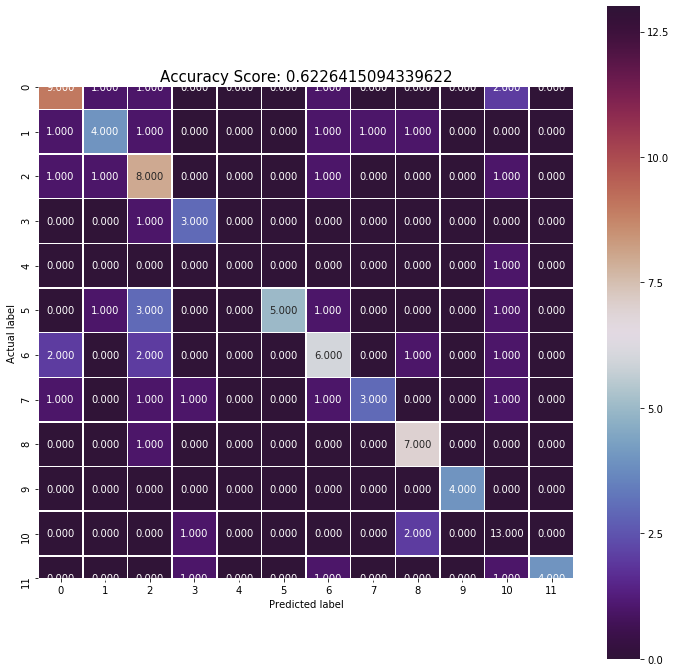

In [120]:
training_matrix_df.Target.value_counts() 

matplot.figure(figsize=(12,12))
sns.heatmap(com_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'twilight_shifted');
matplot.ylabel('Actual label');
matplot.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
matplot.title(all_sample_title, size = 15);

Heat map clearly shows us how many of the labels are correctly calcualted in a more interactive manner. 

In [121]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [122]:
print('Regularization Coefficient for logistic regression predcition is :',logi_model.coef_)

Regularization Coefficient for logistic regression predcition is : [[-3.19127135e-02 -3.67374307e-06 -1.45825432e-02 ... -3.09808978e-02
  -4.59662532e-02  0.00000000e+00]
 [-3.34556824e-02 -3.27260682e-03  5.74212346e-02 ... -3.07060132e-02
  -2.33541217e-02  0.00000000e+00]
 [-7.69065647e-02 -3.64014746e-03 -2.49371407e-02 ... -2.37250409e-02
  -2.43827246e-02  0.00000000e+00]
 ...
 [-9.16937805e-03 -4.06085414e-04 -8.22906950e-03 ... -6.89668143e-03
  -1.41304524e-02  0.00000000e+00]
 [ 5.44954896e-01 -1.46062479e-03 -1.03001861e-03 ... -7.89149442e-03
   7.48416949e-02  0.00000000e+00]
 [-6.19963528e-03 -5.56838432e-03 -3.08766028e-02 ...  6.90047938e-02
  -1.20465815e-02  0.00000000e+00]]


The above code provides us the regularization coefficients which are chosen such that they minimize the loss function. The process of regularization usually improves the generalization performance and we can see that for our data the accuracy obtained is around 62 %, so we can say that we have a decent model performance and our model also has an ok F1 score of 0.58 but more domain knowledge is required to further provide a comment. Though F1 score is a good measure than accuracy as it takes into account both precision and recall and very low F1 scores is a clear indication of poor model performance and F1 score is also a good measure when we don't have very even class distribution which is quite the case in our analysis. 

In [123]:
print('Accuracy for logistic regression predcition is :', accuracy_score(y_test, Logi_Predicted))
print('Recall for logistic regression prediction is :', precision_score(y_test, Logi_Predicted,average="macro"))
print('Precision for logistic regression predcition is :', recall_score(y_test, Logi_Predicted,average="macro"))
print('F1 Score for logistic regression prediction is :', f1_score(y_test, Logi_Predicted,average="macro"))

Accuracy for logistic regression predcition is : 0.6226415094339622
Recall for logistic regression prediction is : 0.6386784511784512
Precision for logistic regression predcition is : 0.5910368566618566
F1 Score for logistic regression prediction is : 0.5890006676190886


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [124]:
print("\n The following is the Classification Report per unique Target Name: \n \n", classification_report(y_test, Logi_Predicted))


 The following is the Classification Report per unique Target Name: 
 
               precision    recall  f1-score   support

       Biden       0.64      0.64      0.64        14
      Booker       0.57      0.44      0.50         9
   Buttigieg       0.44      0.67      0.53        12
      Castro       0.50      0.75      0.60         4
     Gabbard       0.00      0.00      0.00         1
      Harris       1.00      0.45      0.62        11
   Klobuchar       0.50      0.50      0.50        12
    O'Rourke       0.75      0.38      0.50         8
     Sanders       0.64      0.88      0.74         8
      Steyer       1.00      1.00      1.00         4
      Warren       0.62      0.81      0.70        16
        Yang       1.00      0.57      0.73         7

    accuracy                           0.62       106
   macro avg       0.64      0.59      0.59       106
weighted avg       0.66      0.62      0.62       106



/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


For this comparision we can use F1 score again, so we can see that for the class Steyer and Sanders our model performed very well and on the other end for class Booker,Klobuchrar and O'Rourke our model performed comparitively low. Overall accuracy for our model is close to 62%

#### Problem - 9

Next, build a tree-based model. Which model did you use and why? Are there any classes
where it performs particularly well? Are there any classes where it performs particularly
poorly? Use graphs/tables where appropriate and contextualize results.

#### Choosing Random Forest as our tree model 

#### Training Random Forest Classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
ranfor_model = RandomForestClassifier(criterion = 'entropy', max_depth=3).fit(X_train,y_train)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Testing Random Forest Classifier

In [127]:
ranfor_predicted = ranfor_model.predict(X_test)

In [128]:
print('Accuracy for Random Forest Classifier predcition is :', accuracy_score(y_test, ranfor_predicted))
print('Recall for Random Forest Classifier prediction is :', precision_score(y_test, ranfor_predicted,average="macro"))
print('Precision for Random Forest Classifier predcition is :', recall_score(y_test, ranfor_predicted,average="macro"))
print('F1 Score for Random Forest Classifier prediction is :', f1_score(y_test, ranfor_predicted,average="macro"))

Accuracy for Random Forest Classifier predcition is : 0.2169811320754717
Recall for Random Forest Classifier prediction is : 0.09653729071537291
Precision for Random Forest Classifier predcition is : 0.12847222222222224
F1 Score for Random Forest Classifier prediction is : 0.08728044685522408


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


From the above analysis we saw that our Random Forest Classifier performed really poorly and the accuracy obtained is just close to 21.6% which is very low as compared to that obtained from the Logistic Regression model(62%). 

Hence we can give tree based models another try. Lets work with Decesion Tree Classifier with bagging. I have chosen bagging because I had observed in problem set 1 that results (accuracy) had improved with bagging. 

In [253]:
print("\n The following is the Classification Report per unique Target Name: \n \n", classification_report(y_test, ranfor_predicted))


 The following is the Classification Report per unique Target Name: 
 
               precision    recall  f1-score   support

       Biden       0.47      0.50      0.48        14
      Booker       0.00      0.00      0.00         9
   Buttigieg       0.25      0.08      0.12        12
      Castro       0.00      0.00      0.00         4
     Gabbard       0.00      0.00      0.00         1
      Harris       0.00      0.00      0.00        11
   Klobuchar       0.25      0.08      0.12        12
    O'Rourke       0.00      0.00      0.00         8
     Sanders       0.00      0.00      0.00         8
      Steyer       0.00      0.00      0.00         4
      Warren       0.19      0.88      0.31        16
        Yang       0.00      0.00      0.00         7

    accuracy                           0.22       106
   macro avg       0.10      0.13      0.09       106
weighted avg       0.15      0.22      0.14       106



We observe that comparitively for class Biden only our model has performed well. 

#### Decesion Tree Classifier  with bagging

In [129]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [130]:
dTreebg_model = BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=2)).fit(X_train,y_train)

In [131]:
dTreebg_predicted = dTreebg_model.predict(X_test)

In [132]:
print('Accuracy for Decesion Tree Classifier with bagging predcition is :', accuracy_score(y_test, dTreebg_predicted ))
print('Recall for Decesion Tree Classifier with bagging prediction is :', precision_score(y_test, dTreebg_predicted ,average="macro"))
print('Precision for Decesion Tree Classifier with bagging predcition is :', recall_score(y_test, dTreebg_predicted ,average="macro"))
print('F1 Score for Decesion Tree Classifier with bagging prediction is :', f1_score(y_test, dTreebg_predicted ,average="macro"))

Accuracy for Decesion Tree Classifier with bagging predcition is : 0.2169811320754717
Recall for Decesion Tree Classifier with bagging prediction is : 0.1668604342517386
Precision for Decesion Tree Classifier with bagging predcition is : 0.1393022486772487
F1 Score for Decesion Tree Classifier with bagging prediction is : 0.1080519244734931


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


We see that we had no luck with this decision tree classifier which is intuitive as random forest is a collection of multiple of these trees so we cannot use tree based classifier here for our analysis. 

In [254]:
print("\n The following is the Classification Report per unique Target Name: \n \n", classification_report(y_test, dTreebg_predicted))


 The following is the Classification Report per unique Target Name: 
 
               precision    recall  f1-score   support

       Biden       0.46      0.43      0.44        14
      Booker       0.29      0.22      0.25         9
   Buttigieg       0.07      0.08      0.07        12
      Castro       0.00      0.00      0.00         4
     Gabbard       0.00      0.00      0.00         1
      Harris       0.00      0.00      0.00        11
   Klobuchar       0.00      0.00      0.00        12
    O'Rourke       1.00      0.12      0.22         8
     Sanders       0.00      0.00      0.00         8
      Steyer       0.00      0.00      0.00         4
      Warren       0.19      0.81      0.31        16
        Yang       0.00      0.00      0.00         7

    accuracy                           0.22       106
   macro avg       0.17      0.14      0.11       106
weighted avg       0.20      0.22      0.15       106



Again we observe that for the class Biden our model has performed well with respect to the F1 score.

#### Problem - 10 

 Next, build any model other than the ones you’ve already built. Which model did you use and
why? Did you tune hyperparameters? If so, which ones and how? Are there any classes where
it performs particularly well? Are there any classes where it performs particularly poorly? Use
graphs/tables where appropriate and contextualize results.

#### Trying SVM

In [133]:
from sklearn import svm

In [134]:
svm_model = svm.SVC(kernel='poly').fit(X_train,y_train)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [135]:
svm_predicted = svm_model.predict(X_test)

In [136]:
print('Accuracy for SVM Classifier with bagging predcition is :', accuracy_score(y_test, svm_predicted ))
print('Recall for SVM Classifier with bagging prediction is :', precision_score(y_test, svm_predicted ,average="macro"))
print('Precision for SVM Classifier with bagging predcition is :', recall_score(y_test, svm_predicted ,average="macro"))
print('F1 Score for SVM Classifier with bagging prediction is :', f1_score(y_test, svm_predicted ,average="macro"))

Accuracy for SVM Classifier with bagging predcition is : 0.1509433962264151
Recall for SVM Classifier with bagging prediction is : 0.012578616352201257
Precision for SVM Classifier with bagging predcition is : 0.08333333333333333
F1 Score for SVM Classifier with bagging prediction is : 0.02185792349726776


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [137]:
#https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [138]:
print("\n The following is the Classification Report per unique Target Name: \n \n", classification_report(y_test, svm_predicted))


 The following is the Classification Report per unique Target Name: 
 
               precision    recall  f1-score   support

       Biden       0.00      0.00      0.00        14
      Booker       0.00      0.00      0.00         9
   Buttigieg       0.00      0.00      0.00        12
      Castro       0.00      0.00      0.00         4
     Gabbard       0.00      0.00      0.00         1
      Harris       0.00      0.00      0.00        11
   Klobuchar       0.00      0.00      0.00        12
    O'Rourke       0.00      0.00      0.00         8
     Sanders       0.00      0.00      0.00         8
      Steyer       0.00      0.00      0.00         4
      Warren       0.15      1.00      0.26        16
        Yang       0.00      0.00      0.00         7

    accuracy                           0.15       106
   macro avg       0.01      0.08      0.02       106
weighted avg       0.02      0.15      0.04       106



/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


We can observe that our model performed way too poorly with polynomial kernel and only got an accuracy close to a 15% and comparitively model performed well for class Warren comparitively.

#### Hyper Parameter Tuning for SVM classifier

We see that since our number of features is really large than our training data so we can use 'linear' kernel here. 

In [139]:
svm_model_linear = svm.SVC(kernel='linear',gamma = 'auto').fit(X_train,y_train)
svm_predicted_linear = svm_model_linear.predict(X_test)

In [140]:
accuracy_score(y_test, svm_predicted_linear)

0.4716981132075472

We see that our accuracy is significantly improved, though changing Regularization parameter and gamma value doesn't change the accuracy much hence for hyper parameter tuning we are changing just the kernel here. 

#### Problem - 11

Compare the performance of the three classifiers you built. Which is the strongest? Which
is the weakest? Compare their performance across the different classes and use graphs/tables
where appropriate.

We see that strongest model among all the models we have tried yet is Logistic Regression which has an accuracy of around 62%. Then comes SVM model with an accuracy of around 47% and at the end Tree based classifiers performed the worst with an accuracy of just around 16%. 

As described above we can model our data through TF_IDF method (benefits mentioned above) and observe if there are any improvements in the accuracy of the model.

Modelling on the tf_idf training data

In [141]:
X_train,X_test,y_train,y_test = train_test_split(training_matrix_df.iloc[:,:-1], training_matrix_df['Target'], test_size=0.20, random_state=42)

In [142]:
tf_training_matrix_df['Target'] = training_data_new['Names']

In [143]:
tf_training_matrix_df

,ability,able,absolutely,access,accountability,accountable,across,act,action,actually,...,yeah,year,yes,yesterday,yet,york,young,youre,youve,Target
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.292841,0.23059,0.000000,...,0.0,0.065454,0.000000,0.0,0.0,0.0,0.106904,0.0,0.000000,Harris
1,0.000000,0.334548,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,Harris
2,0.397654,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,Harris
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,Warren
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.102635,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,Warren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,Klobuchar
524,0.000000,0.164683,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.060213,0.081717,0.0,0.0,0.0,0.000000,0.0,0.000000,Warren
525,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.242948,Warren
526,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.175756,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,Harris


In [144]:
X_train_tf,X_test_tf,y_train_tf,y_test_tf = train_test_split(tf_training_matrix_df.iloc[:,:-1], tf_training_matrix_df['Target'], test_size=0.20, random_state=42)

In [145]:
tf_training_matrix_df.shape

(528, 904)

In [146]:
tf_svm_model_linear = svm.SVC(kernel='linear',gamma = 'auto').fit(X_train_tf,y_train_tf)
tf_svm_predicted_linear = tf_svm_model_linear.predict(X_test_tf)

In [147]:
accuracy_score(y_test, tf_svm_predicted_linear)

0.5660377358490566

Checking Model Performance on tfidf data through logistic regression 

In [148]:
logi_model_tf = LogisticRegression(random_state=20).fit(X_train_tf, y_train_tf)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [149]:
# Using score method to get accuracy of model
score_tf = logi_model_tf.score(X_test_tf, y_test_tf)
print(score_tf)

0.4528301886792453


We observe that after modelling on the TF-IDF data our accuracy of the SVM model which is considered to be very good with text classification and logistic is considered to be a base line model here, SVM model's performance has imporved significantly, hence we can say that for the next few questions we will proceed with SVM model on the TV-IDF data. 

#### Problem - 12

Using any of the three models of your choosing, generate labels for the test set. Use only
last names in all caps as outputs. In other words, ensure every label is one of the following
(note the lack of apostrophes and punctuation): BIDEN, BOOKER, BUTTIGIEG, CASTRO, GABBARD, HARRIS, KLOBUCHAR, OROURKE, SANDERS, STEYER, WARREN,
YANG. Save these labels as you will include them in your submission, as detailed at the end
of this document.

We see that our model performance on the tfidf data increased with SVM so we will try to test model performance on our main testing data through SVM. 

In [150]:
X_train_tf_svm = tf_training_matrix_df.copy()
X_train_tf_svm = X_train_tf_svm.drop(labels='Target', axis=1)
X_test_tf_svm = tf_testing_matrix_df.copy()

In [151]:
y_train_tf_svm = training_matrix_df['Target']

In [152]:
q12_tf_svm_model_linear = svm.SVC(kernel='linear',gamma = 'auto').fit(X_train_tf_svm,y_train_tf_svm)
q12_tf_svm_predicted_linear = q12_tf_svm_model_linear.predict(X_test_tf_svm)

In [153]:
q12_tf_svm_predicted_linear

array(['Sanders', 'Warren', 'Booker', 'Warren', 'Buttigieg', 'Gabbard',
       'Biden', "O'Rourke", 'Biden', 'Warren', 'Warren', 'Klobuchar',
       'Warren', "O'Rourke", 'Warren', 'Buttigieg', 'Klobuchar',
       'Buttigieg', 'Yang', 'Booker', 'Buttigieg', 'Warren', 'Buttigieg',
       'Klobuchar', 'Booker', 'Klobuchar', 'Buttigieg', 'Biden', 'Biden',
       'Biden', 'Warren', 'Biden', 'Buttigieg', 'Warren', 'Buttigieg',
       'Biden', 'Warren', 'Buttigieg', 'Booker', 'Sanders', 'Castro',
       'Booker', 'Warren', 'Buttigieg', 'Warren', 'Warren', 'Harris',
       'Buttigieg', 'Warren', 'Harris', 'Warren', 'Booker', 'Buttigieg',
       'Sanders', 'Biden', 'Sanders', 'Biden', 'Warren', 'Buttigieg',
       'Yang', 'Booker', 'Klobuchar', 'Warren', 'Warren', 'Harris',
       'Booker', 'Warren', 'Booker', 'Buttigieg', 'Warren', 'Sanders',
       'Sanders', 'Booker', 'Biden', 'Booker', 'Buttigieg', 'Klobuchar',
       'Yang', 'Buttigieg', 'Buttigieg', 'Buttigieg', 'Klobuchar',
       'Butt

In [154]:
test_labels = pd.DataFrame(q12_tf_svm_predicted_linear)

In [155]:
test_labels.columns = ['Predicted Name']

In [156]:
test_labels

,Predicted Name
0,Sanders
1,Warren
2,Booker
3,Warren
4,Buttigieg
...,...
106,Sanders
107,Booker
108,Klobuchar
109,Booker


In [157]:
test_labels['Predicted Name'] = test_labels['Predicted Name'].str.upper() 

In [158]:
test_labels

,Predicted Name
0,SANDERS
1,WARREN
2,BOOKER
3,WARREN
4,BUTTIGIEG
...,...
106,SANDERS
107,BOOKER
108,KLOBUCHAR
109,BOOKER


In [159]:
test_labels['Predicted Name'] = test_labels['Predicted Name'].str.replace('[^\w\s]','')

In [160]:
test_labels.head(50)

,Predicted Name
0,SANDERS
1,WARREN
2,BOOKER
3,WARREN
4,BUTTIGIEG
5,GABBARD
6,BIDEN
7,OROURKE
8,BIDEN
9,WARREN


In [161]:
testing_trial = testing_data_new.copy()

In [162]:
test_labels_trial = test_labels.copy()

In [163]:
test_labels_trial['Actual Comments'] = testing_trial ['Comments']

In [164]:
test_labels_trial

,Predicted Name,Actual Comments
0,SANDERS,i agree. let me… she referenced me. i agreed w...
1,WARREN,"well, a few months after i got elected, the la..."
2,BOOKER,"thank you. probably rand paul. he and i, actua..."
3,WARREN,"so in my view, if fraud is involved, then that..."
4,BUTTIGIEG,"so, first of all, washington experience is not..."
...,...,...
106,SANDERS,"look, on this issue, my friends, there is no c..."
107,BOOKER,"and you know what, we came back four years lat..."
108,KLOBUCHAR,think about the nuclear agreement with russia ...
109,BOOKER,you want to know how we get this done? we get ...


In [165]:
test_labels['File Name'] = pd.Series(trial123['File Name'])

In [166]:
test_labels

,Predicted Name,File Name
0,SANDERS,test_76.txt
1,WARREN,test_62.txt
2,BOOKER,test_111.txt
3,WARREN,test_89.txt
4,BUTTIGIEG,test_105.txt
...,...,...
106,SANDERS,test_84.txt
107,BOOKER,test_90.txt
108,KLOBUCHAR,test_108.txt
109,BOOKER,test_47.txt


In [167]:
X_train_lg = training_matrix_df.copy()
X_train_lg = X_train_lg.drop(labels='Target', axis=1)
X_test_lg = testing_matrix_df.copy()
y_train_lg = training_matrix_df['Target']

In [168]:
logi_model_lg = LogisticRegression(random_state=20).fit(X_train_lg, y_train_lg)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [169]:
logi_model_lg.predict(X_test_lg)

array(['Sanders', 'Warren', 'Booker', 'Steyer', 'Buttigieg', 'Gabbard',
       'Biden', "O'Rourke", 'Biden', 'Warren', 'Warren', 'Biden',
       'Warren', "O'Rourke", 'Warren', 'Buttigieg', 'Klobuchar',
       'Buttigieg', 'Yang', 'Booker', 'Buttigieg', 'Castro', 'Buttigieg',
       'Klobuchar', 'Steyer', 'Klobuchar', 'Biden', 'Sanders', 'Biden',
       'Biden', 'Warren', 'Biden', 'Buttigieg', 'Warren', 'Warren',
       'Biden', 'Buttigieg', 'Buttigieg', 'Booker', 'Sanders', 'Castro',
       'Booker', 'Warren', 'Yang', 'Warren', 'Sanders', 'Yang', 'Sanders',
       'Warren', 'Booker', 'Warren', 'Booker', 'Buttigieg', 'Sanders',
       'Biden', 'Sanders', 'Biden', 'Warren', 'Buttigieg', 'Yang',
       'Gabbard', 'Klobuchar', 'Warren', 'Booker', 'Harris', 'Booker',
       'Warren', 'Harris', 'Buttigieg', 'Warren', 'Steyer', 'Sanders',
       'Buttigieg', 'Biden', 'Booker', 'Buttigieg', 'Klobuchar', 'Yang',
       'Klobuchar', 'Buttigieg', 'Sanders', 'Sanders', 'Buttigieg',
       'Warren

In [170]:
test_labels_lg = pd.DataFrame(logi_model_lg.predict(X_test_lg))

In [171]:
test_labels_lg.columns = ['Predicted Name Logistic']

In [172]:
test_labels_lg['Predicted Name Logistic'] = test_labels_lg['Predicted Name Logistic'].str.upper() 

In [173]:
test_labels_lg['Predicted Name Logistic'] = test_labels_lg['Predicted Name Logistic'].str.replace('[^\w\s]','')

In [174]:
test_labels['Predicted Name Logistic'] = pd.Series(test_labels_lg['Predicted Name Logistic'])

In [175]:
test_labels

,Predicted Name,File Name,Predicted Name Logistic
0,SANDERS,test_76.txt,SANDERS
1,WARREN,test_62.txt,WARREN
2,BOOKER,test_111.txt,BOOKER
3,WARREN,test_89.txt,STEYER
4,BUTTIGIEG,test_105.txt,BUTTIGIEG
...,...,...,...
106,SANDERS,test_84.txt,SANDERS
107,BOOKER,test_90.txt,BOOKER
108,KLOBUCHAR,test_108.txt,KLOBUCHAR
109,BOOKER,test_47.txt,KLOBUCHAR


The above shows a comparision between the labels generated through SVM and Logistic on the TF-IDF analyis.

Now we are choosing SVM model with TF-IDF for our analysis in the coming questions.

#### Question - 13

For this part, we will implement a semi-supervised learning process. As a first step, select which
of the classifiers from part 2 you will use. You want a classifier that outputs class probabilities
(i.e. predict proba in sklearn). We will be training and re-training this classifier 10 more
times so you also want to use a model that does not take long to train. State which model
you chose and your thought process for choosing it versus the other models. You may want to
copy this model to another variable so you can refer to it in its current form later ?

SVM tries to finds the best margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data, while logistic regression does not, instead it can have different decision boundaries with different weights that are near the optimal point hence we are going with SVM. 
We could have chosen Naive Bayes also but it performs the best when all the features chosen are independent of each other but it is 100% the case with our tokens and tree based models didn't perform well as per our expectation hence we are going ahead with SVM. 

In [176]:
training_dataset_13_svm = tf_training_matrix_df.copy()

In [177]:
testing_dataset_13_svm = tf_testing_matrix_df.copy()

#### The below analysis is a combined effort for Problem -14, Problem 15 and Problem -16

#### Working with SVM with tfidf testing and training dataset

In [178]:
SVM_13 = svm.SVC(kernel='linear',gamma = 'auto',probability=True).fit(training_dataset_13_svm.iloc[:,:-1],training_dataset_13_svm.iloc[:,-1])
SVM_13_predicted = SVM_13.predict(testing_dataset_13_svm)

In [179]:
results =SVM_13.predict_proba(testing_dataset_13_svm)[0]

In [180]:
results

array([0.04663071, 0.02482818, 0.09241468, 0.01514827, 0.00874572,
       0.01145903, 0.0864141 , 0.09131778, 0.38125243, 0.01763409,
       0.21688571, 0.00726931])

We see that in the above cell we have successfully calculated the probabilities. 

In [181]:
SVM_13.classes_

array(['Biden', 'Booker', 'Buttigieg', 'Castro', 'Gabbard', 'Harris',
       'Klobuchar', "O'Rourke", 'Sanders', 'Steyer', 'Warren', 'Yang'],
      dtype=object)

In [182]:
trial_13 = testing_dataset_13_svm.copy()

In [183]:
SVM_13_predicted_df = pd.DataFrame(SVM_13_predicted)

#### Appending the probabilities with the testing dataset 

In [184]:
#test_labels['File Name'] = pd.Series(trial123['File Name'])
testing_dataset_13_svm['Predicted_Names_SVM_13'] = pd.Series(SVM_13_predicted_df[0])

In [185]:
def proba_value(x):
    if x['Predicted_Names_SVM_13'] == 'Biden':
        return 0.04562407
    if x['Predicted_Names_SVM_13'] == 'Booker':
        return 0.03063671
    if x['Predicted_Names_SVM_13'] == 'Buttigieg':
        return 0.08824035
    if x['Predicted_Names_SVM_13'] == 'Castro':
        return 0.01504624
    if x['Predicted_Names_SVM_13'] == 'Gabbard':
        return 0.00854555
    if x['Predicted_Names_SVM_13'] == 'Harris':
        return 0.01212717
    if x['Predicted_Names_SVM_13'] == 'Klobuchar':
        return 0.0936352
    if x['Predicted_Names_SVM_13'] == "O'Rourke":
        return 0.10196509
    if x['Predicted_Names_SVM_13'] == 'Sanders':
        return 0.33850753
    if x['Predicted_Names_SVM_13'] == 'Steyer':
        return 0.01693285
    if x['Predicted_Names_SVM_13'] == 'Warren':
        return 0.24147104
    if x['Predicted_Names_SVM_13'] == 'Yang':
        return 0.0072682 

In [186]:
testing_dataset_13_svm['Predicted Probabilities'] = testing_dataset_13_svm.apply(lambda x: proba_value(x), axis=1)

In [187]:
testing_dataset_13_svm = testing_dataset_13_svm.sort_values(by = ['Predicted Probabilities'],ascending = False)

In [188]:
testing_dataset_13_svm = testing_dataset_13_svm.fillna(0,axis = 0)

In [189]:
pp = testing_dataset_13_svm.copy()

#### Creating the testing datasets as per requirement 

In [190]:
test_10 = pp.iloc[:11,:]
test_10 = test_10.drop(labels = 'Predicted Probabilities',axis = 1)
test_10 = test_10.rename(columns={'Predicted_Names_SVM_13':'Target'})

In [191]:
test_20 = pp.iloc[11:22,:]
test_20 = test_20.drop(labels = 'Predicted Probabilities',axis = 1)
test_20 = test_20.rename(columns={'Predicted_Names_SVM_13':'Target'})

In [192]:
test_30 = pp.iloc[22:33,:]
test_30 = test_30.drop(labels = 'Predicted Probabilities',axis = 1)
test_30 = test_30.rename(columns={'Predicted_Names_SVM_13':'Target'})

In [193]:
test_40 = pp.iloc[33:44,:]
test_40 = test_40.drop(labels = 'Predicted Probabilities',axis = 1)
test_40 = test_40.rename(columns={'Predicted_Names_SVM_13':'Target'})

In [194]:
test_50 = pp.iloc[44:55,:]
test_50 = test_50.drop(labels = 'Predicted Probabilities',axis = 1)
test_50 = test_50.rename(columns={'Predicted_Names_SVM_13':'Target'})

In [195]:
test_60 = pp.iloc[55:66,:]
test_60 = test_60.drop(labels = 'Predicted Probabilities',axis = 1)
test_60 = test_60.rename(columns={'Predicted_Names_SVM_13':'Target'})

In [196]:
test_70 = pp.iloc[66:77,:]
test_70 = test_70.drop(labels = 'Predicted Probabilities',axis = 1)
test_70 = test_70.rename(columns={'Predicted_Names_SVM_13':'Target'})

In [197]:
test_80 = pp.iloc[77:88,:]
test_80 = test_80.drop(labels = 'Predicted Probabilities',axis = 1)
test_80 = test_80.rename(columns={'Predicted_Names_SVM_13':'Target'})

In [198]:
test_90 = pp.iloc[88:99,:]
test_90 = test_90.drop(labels = 'Predicted Probabilities',axis = 1)
test_90 = test_90.rename(columns={'Predicted_Names_SVM_13':'Target'})

In [199]:
test_100 = pp.iloc[99:111,:]
test_100 = test_100.drop(labels = 'Predicted Probabilities',axis = 1)
test_100 = test_100.rename(columns={'Predicted_Names_SVM_13':'Target'})

#### Adding Rows to the Training_data from the different proportions of the testing data

In [200]:
train_0 = training_dataset_13_svm.copy()

In [201]:
train_0.shape

(528, 904)

In [202]:
test_10.shape

(11, 904)

In [203]:
train_10 = pd.concat([train_0, test_10], axis=0)

In [204]:
train_20 = pd.concat([train_10, test_20], axis=0)

In [205]:
train_30 = pd.concat([train_20, test_30], axis=0)

In [206]:
train_40 = pd.concat([train_30, test_40], axis=0)

In [207]:
train_50 = pd.concat([train_40, test_50], axis=0)

In [208]:
train_60 = pd.concat([train_50, test_60], axis=0)

In [209]:
train_70 = pd.concat([train_60, test_70], axis=0)

In [210]:
train_80 = pd.concat([train_70, test_80], axis=0)

In [211]:
train_90 = pd.concat([train_80, test_90], axis=0)

In [212]:
train_100 = pd.concat([train_90, test_100], axis=0)

#### Training and Testing 

In [213]:
train_list = [train_0,train_10,train_20,train_30,train_40,train_50,train_60,train_70,train_80,train_90,train_100]

In [214]:
accuracies = []
for item in train_list:
    X_train_final,X_test_final,y_train_final,y_test_final = train_test_split(item.iloc[:,:-1], item['Target'], test_size=0.20, random_state=21)
    SVM_final = svm.SVC(kernel='linear',gamma = 'auto').fit(X_train_final,y_train_final)
    SVM_predicted_final = SVM_final.predict(X_test_final)
    accuracies.append(accuracy_score(y_test_final, SVM_predicted_final))
print(accuracies)

[0.4716981132075472, 0.49074074074074076, 0.5363636363636364, 0.5575221238938053, 0.4608695652173913, 0.47863247863247865, 0.5378151260504201, 0.512396694214876, 0.5967741935483871, 0.5396825396825397, 0.5625]


We observe that after adding the first 10% of the data to our training dataset accuracy of our SVM classifier has increased slightly to a 49% as earlier from 47% hence we can say that there is a slight imporvement. 

In [215]:
list_X = ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']

#### Plotting Percentage of Test data Used vs Accuracies

In [216]:
plot_df = pd.DataFrame()

In [217]:
plot_df['Test Percentage'] = list_X

In [218]:
plot_df['Accuracies'] = accuracies

In [219]:
plot_df

,Test Percentage,Accuracies
0,0%,0.471698
1,10%,0.490741
2,20%,0.536364
3,30%,0.557522
4,40%,0.460870
5,50%,0.478632
6,60%,0.537815
7,70%,0.512397
8,80%,0.596774
9,90%,0.539683


In [257]:
sum(accuracies)/11 #Mean accuracy calculation

0.5222722919592566

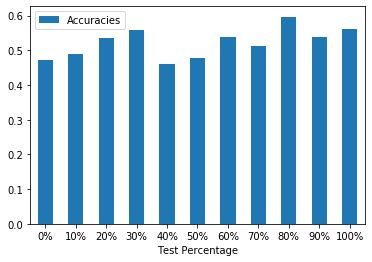

In [255]:
plot_df.plot(x='Test Percentage', y='Accuracies', kind='bar')
matplot.xticks(rotation=360)
matplot.show()

The plot seem to have no specific trend but we observe that the with every addition of the testing data initially it is increasing then around 40% there is a dip and then increasing then around 90 % there is a dip but on an average the mean of our accuracies is around 52%. Not significant help observed here. 

#### Problem - 16

Using the model that is trained on the entirety of the training data and 100% of the test data
(labeled by you), generate a final set of labels for the test data. Be sure to only use last names in all caps for the labels, as you did in Question 12. Include these in your submission per the
instructions below.

In [221]:
X_train_16 = train_100.copy() 
X_train_16 = X_train_16.iloc[:,:-1]

We are choosing train_100 here as it is a combination of the entirety of the training data and 100% of the test data that is labelled above. 

In [222]:
y_train_16 = train_100.iloc[:,-1]

In [223]:
X_test_16 = testing_dataset_13_svm.iloc[:,:903]

In [224]:
SVM_final_16 = svm.SVC(kernel='linear').fit(X_train_16,y_train_16)


In [225]:
SVM_predicted_final_16 = SVM_final_16.predict(X_test_16)

In [226]:
SVM_predicted_final_16

array(['Sanders', 'Sanders', 'Sanders', 'Sanders', 'Sanders', 'Sanders',
       'Sanders', 'Sanders', 'Warren', 'Warren', 'Warren', 'Warren',
       'Warren', 'Warren', 'Warren', 'Warren', 'Warren', 'Warren',
       'Warren', 'Warren', 'Warren', 'Warren', 'Warren', 'Warren',
       'Warren', 'Warren', 'Warren', 'Warren', 'Warren', 'Warren',
       'Warren', 'Warren', 'Warren', 'Warren', "O'Rourke", "O'Rourke",
       "O'Rourke", "O'Rourke", 'Klobuchar', 'Klobuchar', 'Klobuchar',
       'Klobuchar', 'Klobuchar', 'Klobuchar', 'Klobuchar', 'Klobuchar',
       'Klobuchar', 'Klobuchar', 'Klobuchar', 'Klobuchar', 'Klobuchar',
       'Buttigieg', 'Buttigieg', 'Buttigieg', 'Buttigieg', 'Buttigieg',
       'Buttigieg', 'Buttigieg', 'Buttigieg', 'Buttigieg', 'Buttigieg',
       'Buttigieg', 'Buttigieg', 'Buttigieg', 'Buttigieg', 'Buttigieg',
       'Buttigieg', 'Buttigieg', 'Buttigieg', 'Buttigieg', 'Buttigieg',
       'Buttigieg', 'Biden', 'Biden', 'Biden', 'Biden', 'Biden', 'Biden',
       'Bi

In [227]:
test_labels['Final_Prediction'] = SVM_predicted_final_16

In [228]:
test_labels = test_labels.drop(labels = 'Predicted Name Logistic',axis = 1)

In [229]:
test_labels = test_labels.drop(labels = 'File Name',axis = 1)

In [230]:
test_labels['Final_Prediction'] = test_labels['Final_Prediction'].str.upper() 

In [231]:
test_labels['Final_Prediction'] = test_labels['Final_Prediction'].str.replace('[^\w\s]','')

In [232]:
names_1 = pd.DataFrame()

In [233]:
names_1['names'] = files_1

In [234]:
names_1

,names
0,/Users/apple/Desktop/Problem_Set_3/test/test_7...
1,/Users/apple/Desktop/Problem_Set_3/test/test_6...
2,/Users/apple/Desktop/Problem_Set_3/test/test_1...
3,/Users/apple/Desktop/Problem_Set_3/test/test_8...
4,/Users/apple/Desktop/Problem_Set_3/test/test_1...
...,...
106,/Users/apple/Desktop/Problem_Set_3/test/test_8...
107,/Users/apple/Desktop/Problem_Set_3/test/test_9...
108,/Users/apple/Desktop/Problem_Set_3/test/test_1...
109,/Users/apple/Desktop/Problem_Set_3/test/test_4...


In [235]:
names_1['names'] = names_1['names'].str.replace('/Users/apple/Desktop/Problem_Set_3/test/', '')

In [236]:
names_1

,names
0,test_76.txt
1,test_62.txt
2,test_111.txt
3,test_89.txt
4,test_105.txt
...,...
106,test_84.txt
107,test_90.txt
108,test_108.txt
109,test_47.txt


In [237]:
test_labels['File'] = names_1

In [238]:
test_labels

,Predicted Name,Final_Prediction,File
0,SANDERS,SANDERS,test_76.txt
1,WARREN,SANDERS,test_62.txt
2,BOOKER,SANDERS,test_111.txt
3,WARREN,SANDERS,test_89.txt
4,BUTTIGIEG,SANDERS,test_105.txt
...,...,...,...
106,SANDERS,GABBARD,test_84.txt
107,BOOKER,GABBARD,test_90.txt
108,KLOBUCHAR,YANG,test_108.txt
109,BOOKER,YANG,test_47.txt


In [239]:
test_labels.columns = ['MODEL1','MODEL2','FILE']

In [240]:
test_labels = test_labels[['FILE','MODEL1','MODEL2']]

In [241]:
test_labels = test_labels.sort_values('FILE')

In [242]:
test_labels # we see that we have created the text file in the desired format. 

,FILE,MODEL1,MODEL2
56,test_1.txt,BIDEN,BUTTIGIEG
44,test_10.txt,WARREN,KLOBUCHAR
28,test_100.txt,BIDEN,WARREN
30,test_101.txt,WARREN,WARREN
22,test_102.txt,BUTTIGIEG,WARREN
...,...,...,...
78,test_95.txt,BUTTIGIEG,BIDEN
86,test_96.txt,BOOKER,BOOKER
85,test_97.txt,HARRIS,BOOKER
29,test_98.txt,BIDEN,WARREN


In [243]:
test_labels = test_labels.reset_index(drop=True) #Index reset has been done. 

In [244]:
test_labels

,FILE,MODEL1,MODEL2
0,test_1.txt,BIDEN,BUTTIGIEG
1,test_10.txt,WARREN,KLOBUCHAR
2,test_100.txt,BIDEN,WARREN
3,test_101.txt,WARREN,WARREN
4,test_102.txt,BUTTIGIEG,WARREN
...,...,...,...
106,test_95.txt,BUTTIGIEG,BIDEN
107,test_96.txt,BOOKER,BOOKER
108,test_97.txt,HARRIS,BOOKER
109,test_98.txt,BIDEN,WARREN


In [245]:
test_labels.to_csv("Rohan_Khurana.txt", index=False, header = True, sep='\t')